# SUP I
## Suplementos Alimentares
### Case de Marketing e Análise de Dados
- Nomes


In [236]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from numpy import arange 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os 
import math
from math import sqrt

Carregando a base de dados em um dataframe usando a biblioteca pandas:

Exclusão da primeira linha, com as perguntas escritas, manualmente.


In [237]:
df = pd.read_excel('Base - Pesquisa de Mercado.xlsx', sheet_name=0)
print(df.head())

   Qfreq   P2  P3   P4   P5   P6   P7   P8   P9 P12  ...  P24  P25  P26  Qesc  \
0      4  NaN NaN  7.0  2.0  7.0  7.0  1.0  1.0   1  ...  3.0  7.0  7.0     3   
1      4  NaN NaN  5.0  1.0  1.0  3.0  5.0  4.0   1  ...  6.0  6.0  4.0     5   
2      2  NaN NaN  6.0  1.0  6.0  3.0  6.0  1.0   1  ...  7.0  7.0  7.0     4   
3      1  NaN NaN  2.0  1.0  2.0  2.0  2.0  1.0   2  ...  NaN  NaN  NaN     3   
4      1  NaN NaN  7.0  7.0  7.0  2.0  7.0  7.0   1  ...  7.0  7.0  7.0     4   

   Qciv  Qocup  Qgen  Qid  Qreg  Qclasse  
0     2    3.0     1   31     3        5  
1     1    3.0     1   59     4        3  
2     1    2.0     1   20     2        3  
3     2    2.0     1   24     1        5  
4     1    3.0     1   40     4        5  

[5 rows x 31 columns]


In [238]:
df.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,702.000000,363.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,702.000000,702.000000,400.000000,702.000000,702.000000,702.000000,702.00000
mean,3.528490,4.088154,4.982301,3.053097,3.669617,4.681416,4.268437,3.663717,5.756863,4.988235,...,5.031373,5.105882,5.317647,4.703704,1.474359,2.922500,1.514245,21.039886,2.190883,2.64245
std,1.707135,2.043166,2.099517,2.316039,2.356533,1.995255,2.503590,2.558004,1.656442,1.995038,...,1.968001,1.998170,1.793767,1.071196,0.754481,1.261138,0.511435,18.963396,1.437436,1.42289
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.00000
50%,5.000000,4.000000,6.000000,2.000000,4.000000,5.000000,5.000000,3.000000,7.000000,5.000000,...,5.000000,6.000000,6.000000,5.000000,1.000000,3.000000,2.000000,20.000000,1.000000,3.00000
75%,5.000000,6.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,5.000000,2.000000,4.000000,2.000000,35.000000,4.000000,4.00000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,3.000000,100.000000,5.000000,5.00000


In [239]:
df.Qfreq.value_counts(normalize=True)

5    0.517094
1    0.235043
2    0.108262
4    0.072650
3    0.066952
Name: Qfreq, dtype: float64

In [240]:
df.dtypes

Qfreq        int64
P2          object
P3         float64
P4         float64
P5         float64
P6         float64
P7         float64
P8         float64
P9         float64
P12         object
P13         object
P14         object
P15        float64
P16        float64
P17        float64
P18        float64
P19        float64
P20        float64
P21        float64
P22        float64
P23        float64
P24        float64
P25        float64
P26        float64
Qesc         int64
Qciv         int64
Qocup      float64
Qgen         int64
Qid          int64
Qreg         int64
Qclasse      int64
dtype: object

In [241]:
df.Qfreq = df['Qfreq'].astype('float')
df.Qid = df['Qid'].astype('float')


In [242]:
df.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,702.000000,363.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,702.000000,702.000000,400.000000,702.000000,702.000000,702.000000,702.00000
mean,3.528490,4.088154,4.982301,3.053097,3.669617,4.681416,4.268437,3.663717,5.756863,4.988235,...,5.031373,5.105882,5.317647,4.703704,1.474359,2.922500,1.514245,21.039886,2.190883,2.64245
std,1.707135,2.043166,2.099517,2.316039,2.356533,1.995255,2.503590,2.558004,1.656442,1.995038,...,1.968001,1.998170,1.793767,1.071196,0.754481,1.261138,0.511435,18.963396,1.437436,1.42289
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.00000
50%,5.000000,4.000000,6.000000,2.000000,4.000000,5.000000,5.000000,3.000000,7.000000,5.000000,...,5.000000,6.000000,6.000000,5.000000,1.000000,3.000000,2.000000,20.000000,1.000000,3.00000
75%,5.000000,6.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,5.000000,2.000000,4.000000,2.000000,35.000000,4.000000,4.00000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,3.000000,100.000000,5.000000,5.00000


In [243]:
i=0
while i < len(df.Qid):
    if df.Qid[i] > 6:
        if df.Qid[i] < 18:
            df.Qid[i] = 1
        elif df.Qid[i] < 25:
            df.Qid[i] = 2
        elif df.Qid[i] < 35:
            df.Qid[i] = 3
        elif df.Qid[i] < 45:
            df.Qid[i] = 4
        elif df.Qid[i] < 55:
            df.Qid[i] = 5
        else:
            df.Qid[i] = 6
    i+=1

C:\Users\loren\AppData\Local\Temp\ipykernel_6728\2702381451.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Qid[i] = 3
C:\Users\loren\AppData\Local\Temp\ipykernel_6728\2702381451.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Qid[i] = 6
C:\Users\loren\AppData\Local\Temp\ipykernel_6728\2702381451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Qid[i] = 2
C:\Users\loren\AppData\Local\Temp\ipykernel_6728\2702381451.

In [244]:
df.head()

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
0,4.0,NaN,NaN,7.0,2.0,7.0,7.0,1.0,1.0,1,...,3.0,7.0,7.0,3,2,3.0,1,3.0,3,5
1,4.0,NaN,NaN,5.0,1.0,1.0,3.0,5.0,4.0,1,...,6.0,6.0,4.0,5,1,3.0,1,6.0,4,3
2,2.0,NaN,NaN,6.0,1.0,6.0,3.0,6.0,1.0,1,...,7.0,7.0,7.0,4,1,2.0,1,2.0,2,3
3,1.0,NaN,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2,...,NaN,NaN,NaN,3,2,2.0,1,2.0,1,5
4,1.0,NaN,NaN,7.0,7.0,7.0,2.0,7.0,7.0,1,...,7.0,7.0,7.0,4,1,3.0,1,4.0,4,5


Text(0.5, 0, 'Classe')

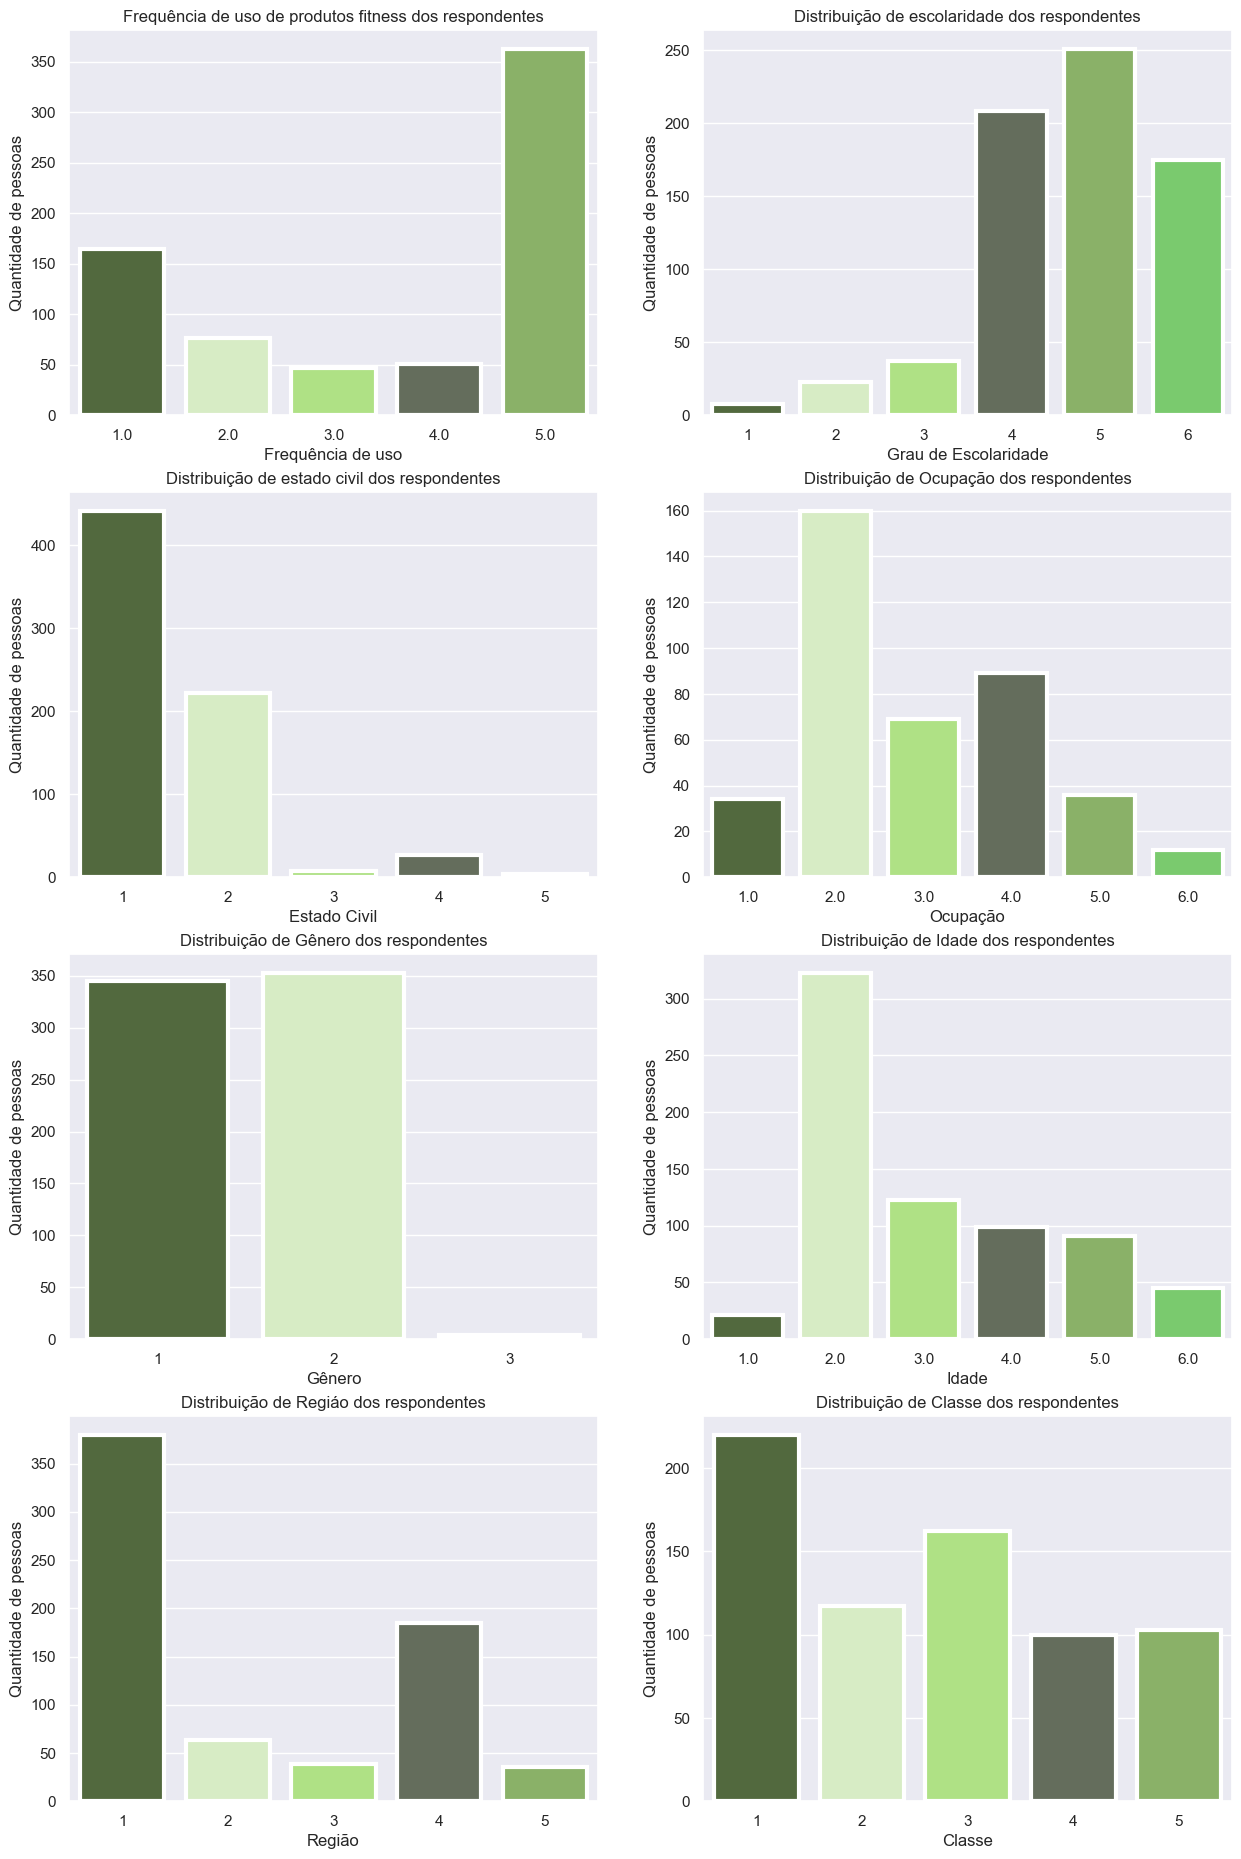

In [343]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df, x="Qfreq", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Frequência de uso de produtos fitness dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de uso')

plt.subplot(622)
sns.countplot(data= df, x="Qesc", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de escolaridade dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(623)
sns.countplot(data= df, x="Qciv", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de estado civil dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(624)
sns.countplot(data= df, x="Qocup", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Ocupação dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(625)
sns.countplot(data= df, x="Qgen", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Gênero dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(626)
sns.countplot(data= df, x="Qid", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(627)
sns.countplot(data= df, x="Qreg", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(628)
sns.countplot(data= df, x="Qclasse", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

In [290]:
df_naousa = df[df.Qfreq==5]

df_naousa

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
7,5.0,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,3.0,1,2.0,4,5
10,5.0,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,1,5.0,1,2.0,3,5
14,5.0,1;3;4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,4.0,1,2.0,3,5
15,5.0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,1,3.0,1,1.0,4,5
17,5.0,7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,2,2.0,1,2.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,5.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,NaN,2,2.0,1,1
698,5.0,1; 5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5,1,NaN,1,2.0,1,2
699,5.0,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,2,NaN,2,4.0,4,1
700,5.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,NaN,1,2.0,4,5


In [330]:
df_naousa.iloc[:,[0,1,2,24,25,26,27,28,29,30]].describe()



,Qfreq,P3,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,363.0,363.000000,363.000000,363.000000,139.000000,363.000000,363.000000,363.000000,363.000000
mean,5.0,4.088154,4.867769,1.402204,3.021583,1.484848,2.920110,2.123967,2.074380
std,0.0,2.043166,0.965786,0.675699,1.236332,0.511381,1.342755,1.384026,1.303408
min,5.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.0,2.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,5.0,4.000000,5.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000
75%,5.0,6.000000,6.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000
max,5.0,7.000000,6.000000,5.000000,6.000000,3.000000,6.000000,5.000000,5.000000


Text(0.5, 0, 'Utilizariam produtos se fossem mais baratos')

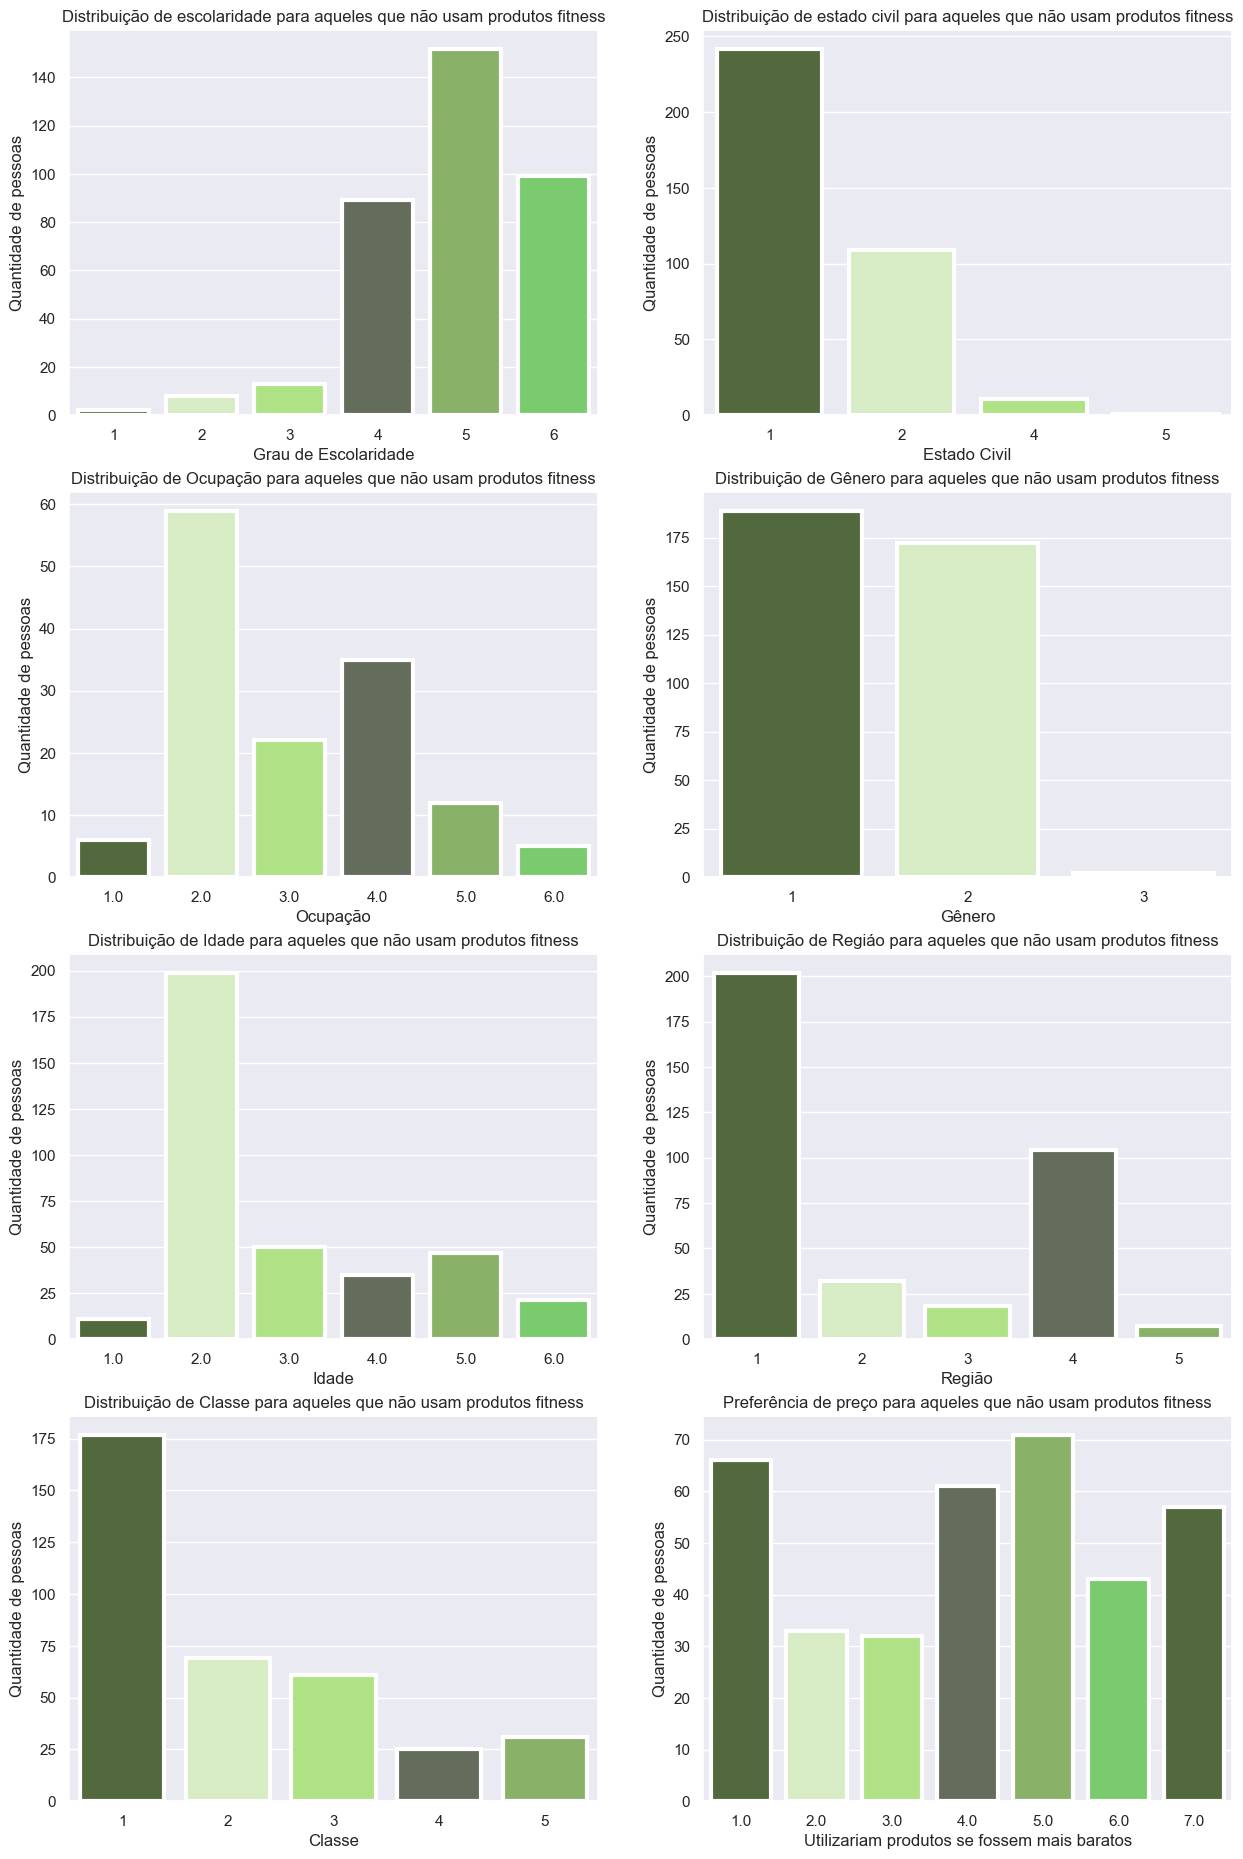

In [341]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_naousa, x="Qesc", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de escolaridade para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(622)
sns.countplot(data= df_naousa, x="Qciv", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de estado civil para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(623)
sns.countplot(data= df_naousa, x="Qocup", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Ocupação para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(624)
sns.countplot(data= df_naousa, x="Qgen", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Gênero para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(625)
sns.countplot(data= df_naousa, x="Qid", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(626)
sns.countplot(data= df_naousa, x="Qreg", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(627)
sns.countplot(data= df_naousa, x="Qclasse", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

plt.subplot(628)
sns.countplot(data= df_naousa, x="P3", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Preferência de preço para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Utilizariam produtos se fossem mais baratos')


In [313]:
df_naosup = df[df.P12==2]
df_naosup.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,84.000000,0.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,0.0,0.0,...,0.0,0.0,0.0,84.000000,84.000000,65.000000,84.000000,84.000000,84.000000,84.000000
mean,1.797619,NaN,4.440476,2.964286,3.476190,4.333333,4.000000,3.321429,NaN,NaN,...,NaN,NaN,NaN,4.440476,1.452381,2.953846,1.583333,3.214286,2.083333,3.345238
std,1.027100,NaN,2.299037,2.386945,2.351499,2.251283,2.578876,2.593601,NaN,NaN,...,NaN,NaN,NaN,1.165273,0.665949,1.178330,0.519693,1.326935,1.424471,1.392701
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,NaN,2.000000,1.000000,1.000000,2.750000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,1.000000,NaN,4.500000,1.500000,3.500000,4.000000,4.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,4.000000,1.000000,3.000000,2.000000,3.000000,1.000000,3.500000
75%,3.000000,NaN,7.000000,5.000000,5.000000,7.000000,7.000000,7.000000,NaN,NaN,...,NaN,NaN,NaN,5.000000,2.000000,4.000000,2.000000,4.000000,4.000000,5.000000
max,4.000000,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,NaN,NaN,...,NaN,NaN,NaN,6.000000,4.000000,6.000000,3.000000,6.000000,5.000000,5.000000


Text(0.5, 0, 'AutoPrescrição')

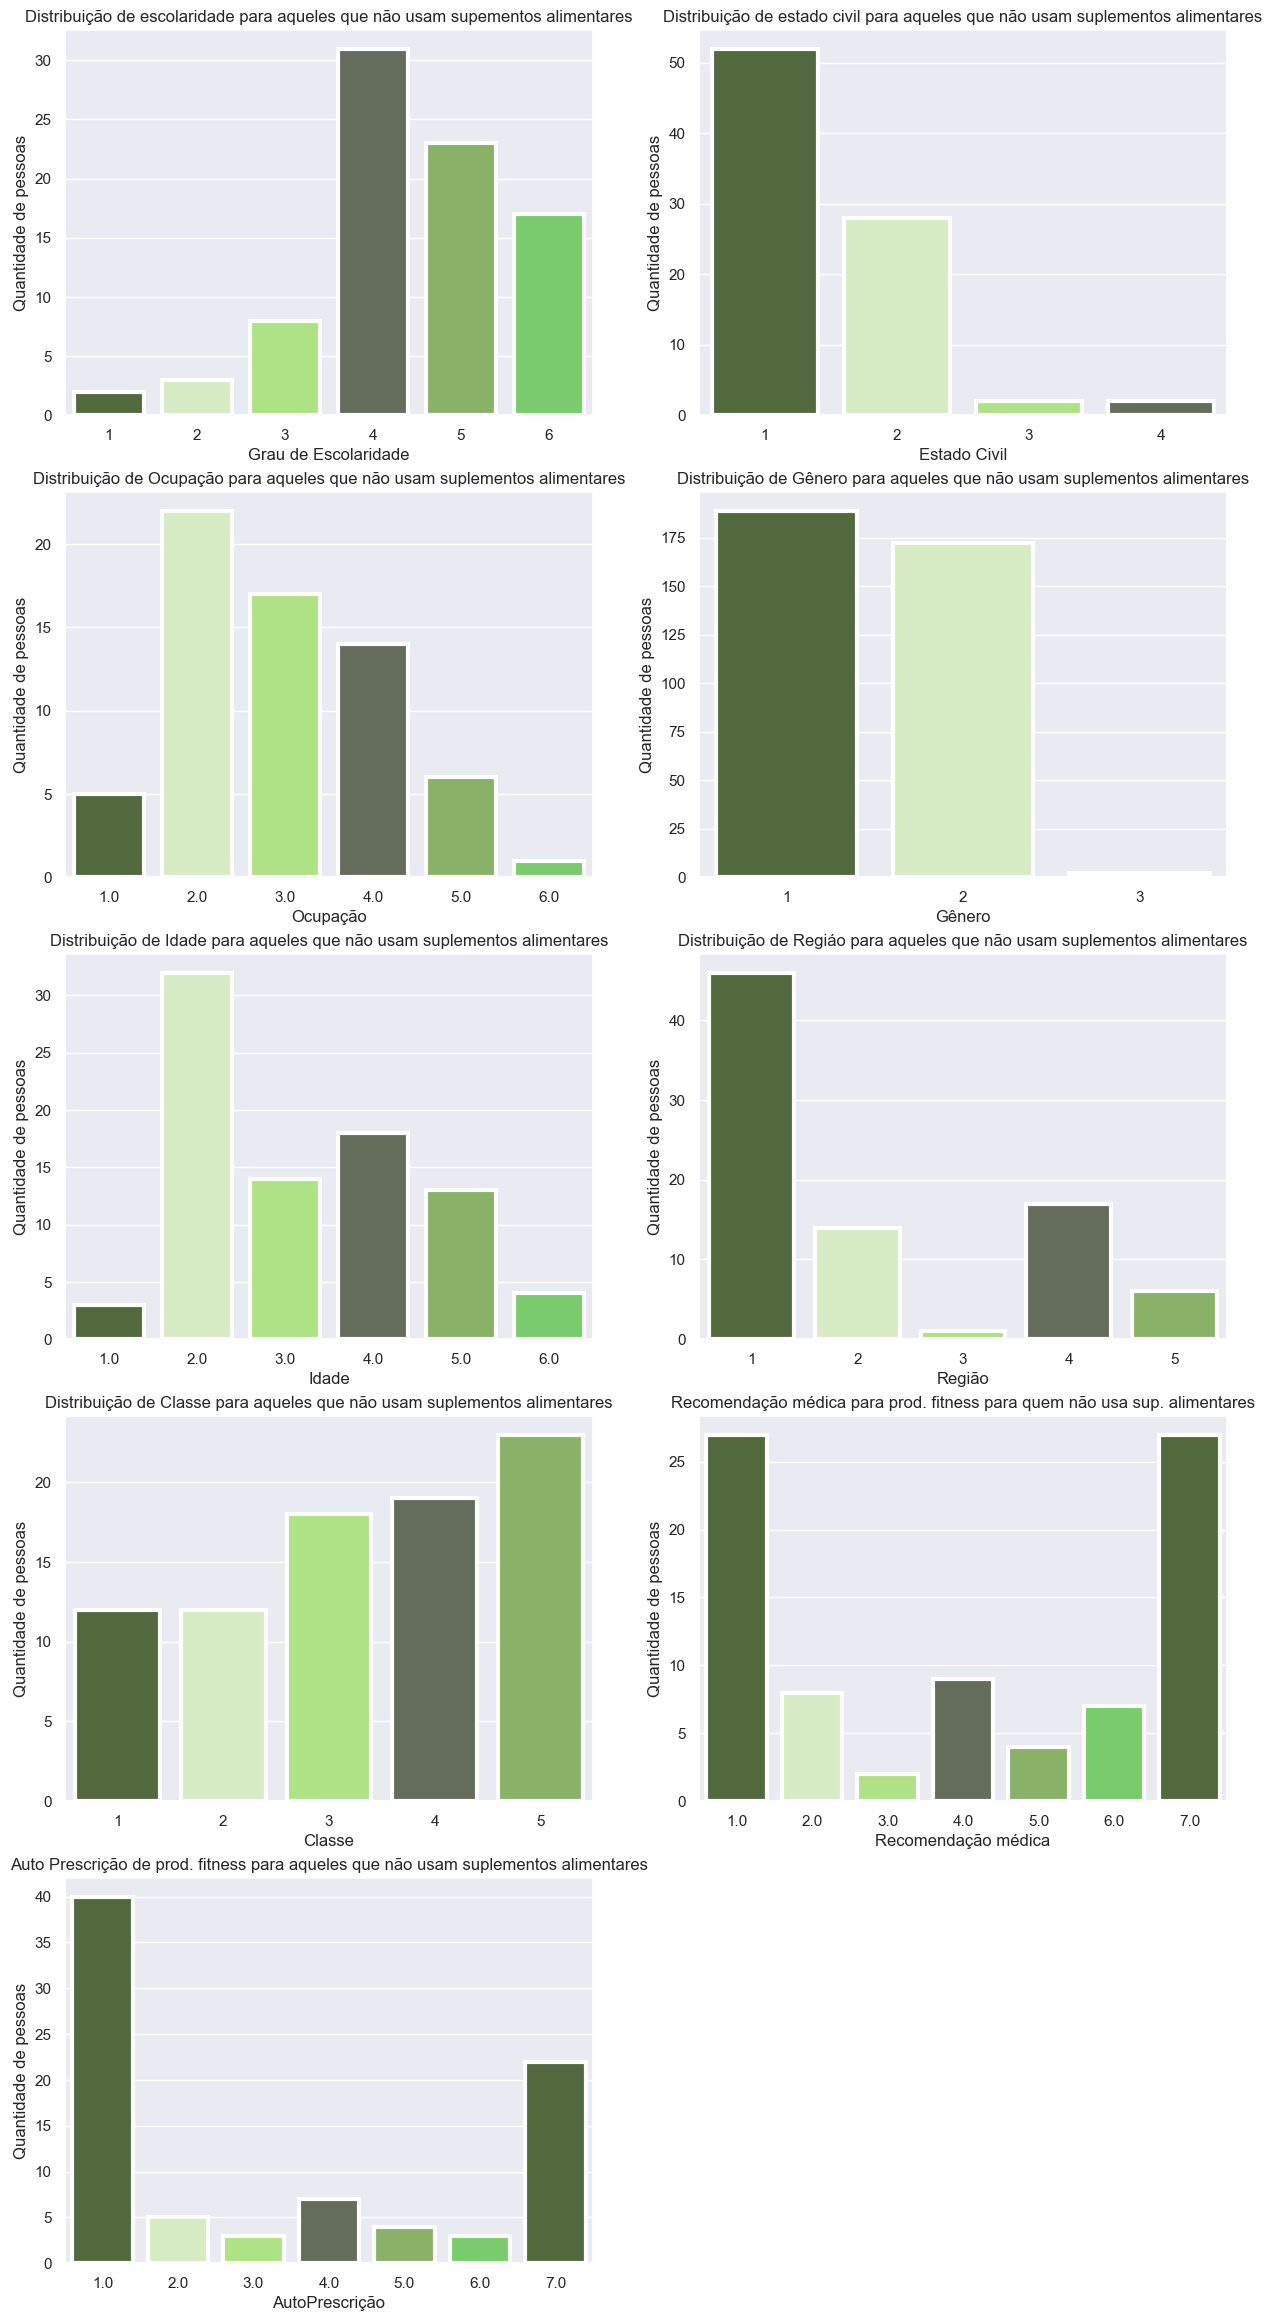

In [342]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_naosup, x="Qesc", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de escolaridade para aqueles que não usam supementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(622)
sns.countplot(data= df_naosup, x="Qciv", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de estado civil para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(623)
sns.countplot(data= df_naosup, x="Qocup", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Ocupação para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(624)
sns.countplot(data= df_naousa, x="Qgen", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Gênero para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(625)
sns.countplot(data= df_naosup, x="Qid", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(626)
sns.countplot(data= df_naosup, x="Qreg", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(627)
sns.countplot(data= df_naosup, x="Qclasse", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

plt.subplot(628)
sns.countplot(data= df_naosup, x="P8", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Recomendação médica para prod. fitness para quem não usa sup. alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Recomendação médica')

plt.subplot(629)
sns.countplot(data= df_naosup, x="P9", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Auto Prescrição de prod. fitness para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('AutoPrescrição')

In [347]:
df_usaf = df[df.Qfreq != 5]
df_usa = df_usaf[df_usaf.P12 != 2]
df_usa.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,255.000000,0.0,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,196.000000,255.000000,255.000000,255.000000,255.000000
mean,2.003922,NaN,5.160784,3.082353,3.733333,4.796078,4.356863,3.776471,5.756863,4.988235,...,5.031373,5.105882,5.317647,4.556863,1.584314,2.841837,1.533333,3.243137,2.321569,3.219608
std,1.131155,NaN,2.002369,2.296240,2.359323,1.894247,2.477080,2.541203,1.656442,1.995038,...,1.968001,1.998170,1.793767,1.144871,0.869286,1.305014,0.507684,1.338299,1.510633,1.254444
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,NaN,4.000000,1.000000,1.000000,3.500000,1.000000,1.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,2.000000,NaN,6.000000,2.000000,4.000000,5.000000,5.000000,4.000000,7.000000,5.000000,...,5.000000,6.000000,6.000000,5.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000
75%,3.000000,NaN,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,5.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000
max,4.000000,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,3.000000,6.000000,5.000000,5.000000


Text(0.5, 0, 'Classe')

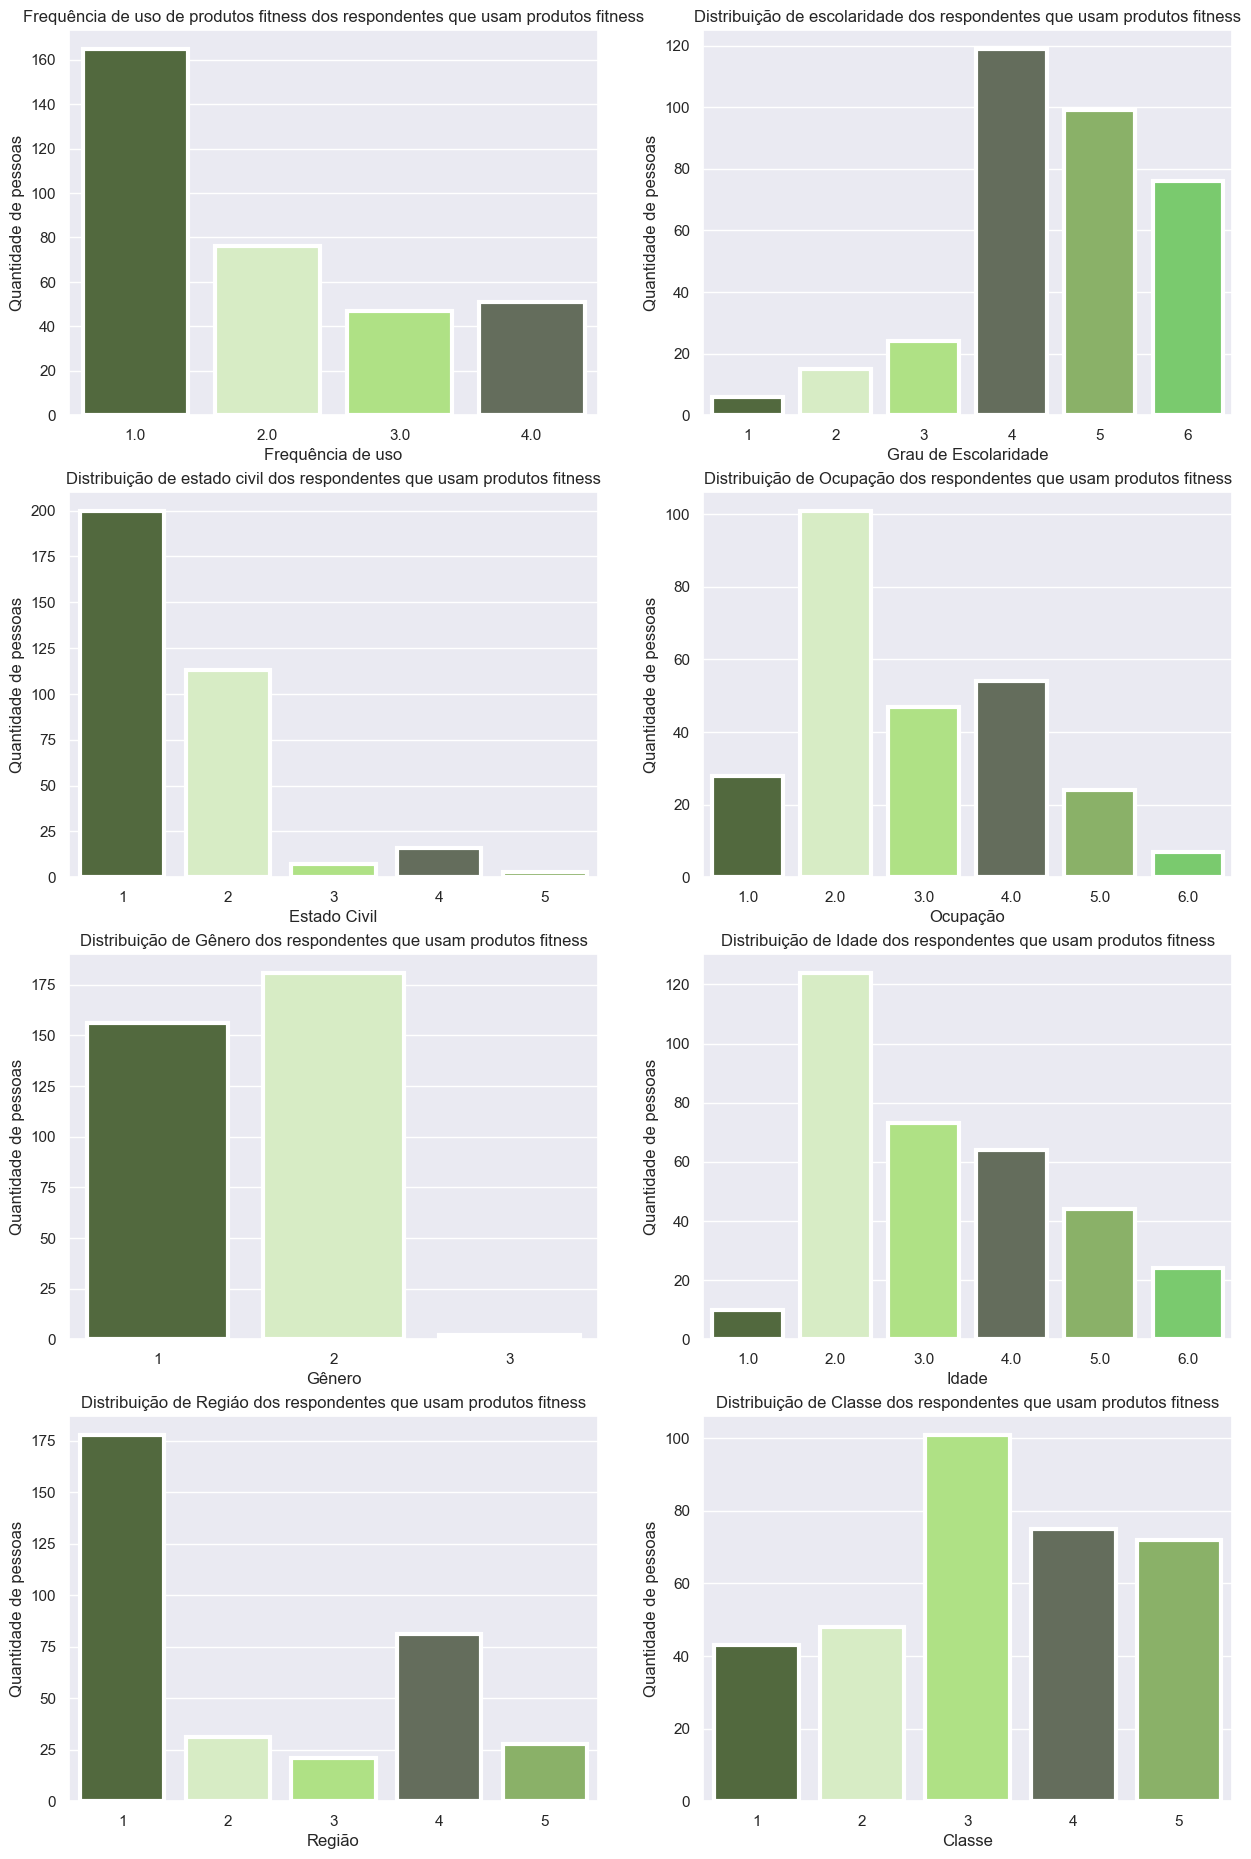

In [349]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_usaf, x="Qfreq", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Frequência de uso de produtos fitness dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de uso')

plt.subplot(622)
sns.countplot(data= df_usaf, x="Qesc", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de escolaridade dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(623)
sns.countplot(data= df_usaf, x="Qciv", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de estado civil dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(624)
sns.countplot(data= df_usaf, x="Qocup", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Ocupação dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(625)
sns.countplot(data= df_usaf, x="Qgen", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Gênero dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(626)
sns.countplot(data= df_usaf, x="Qid", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(627)
sns.countplot(data= df_usaf, x="Qreg", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(628)
sns.countplot(data= df_usaf, x="Qclasse", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

### Clusterização e Redução de Dimensionalidade

Iniciaremos com duas forma de análise de dados: PCA e Kmeans Cluster

Vamos atribuir algumas perguntas para as classificações em tipos de variáveis

In [350]:
df_usa.Qreg = df_usa.Qreg.astype('category')
df_usa.Qclasse = df_usa.Qclasse.astype('category')
df_usa.Qid = df_usa.Qid.astype('category')

df_usa.Qreg.cat.categories = [1, 2, 3, 4, 5]
df_usa.Qclasse.cat.categories = [1, 2, 3, 4, 5]
df_usa.Qid.cat.categories =  [1, 2, 3, 4, 5, 6]

C:\Users\loren\AppData\Local\Temp\ipykernel_6728\4016859128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.Qreg = df_usa.Qreg.astype('category')
C:\Users\loren\AppData\Local\Temp\ipykernel_6728\4016859128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.Qclasse = df_usa.Qclasse.astype('category')
C:\Users\loren\AppData\Local\Temp\ipykernel_6728\4016859128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

### Seleção de perguntas

Agora que a base de dados foi limpa, e selecionamos respondentes que fazem um maior uso de suplementos, podemos selecionar as perguntas mais relevantes para fazermos a noralização e clusterização de base de dados.

Selecionamos as perguntas que estabelecemos ser mais diferenciais para identificar clusters dentro da nossa base de dados.

In [359]:
df_p = df_usa.loc[:,['P15', 'P16', 'P17', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P26', 'Qesc', 'Qciv', 'Qocup', 'Qid', 'Qgen', 'Qreg', 'Qclasse']]
df_p.describe()

,P15,P16,P17,P19,P20,P21,P22,P23,P24,P26,Qesc,Qciv,Qocup,Qgen
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,196.000000,255.000000
mean,5.756863,4.988235,5.031373,5.105882,6.011765,5.905882,5.317647,5.756863,5.031373,5.317647,4.556863,1.584314,2.841837,1.533333
std,1.656442,1.995038,1.968001,1.998170,1.462073,1.526332,1.793767,1.656442,1.968001,1.793767,1.144871,0.869286,1.305014,0.507684
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000
50%,7.000000,5.000000,5.000000,6.000000,7.000000,7.000000,6.000000,7.000000,5.000000,6.000000,5.000000,1.000000,2.000000,2.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,2.000000,4.000000,2.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,3.000000


In [356]:
df_p.isnull().sum()

P15         0
P16         0
P17         0
P19         0
P20         0
P21         0
P22         0
P23         0
P24         0
P26         0
Qesc        0
Qciv        0
Qocup      59
Qid         0
Qgen        0
Qreg        0
Qclasse     0
dtype: int64

In [361]:
df_p = df_p.fillna(df_p.median())
df_p.describe()

C:\Users\loren\AppData\Local\Temp\ipykernel_6728\2684405720.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_p = df_p.fillna(df_p.median())


,P15,P16,P17,P19,P20,P21,P22,P23,P24,P26,Qesc,Qciv,Qocup,Qgen
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,5.756863,4.988235,5.031373,5.105882,6.011765,5.905882,5.317647,5.756863,5.031373,5.317647,4.556863,1.584314,2.841837,1.533333
std,1.656442,1.995038,1.968001,1.998170,1.462073,1.526332,1.793767,1.656442,1.968001,1.793767,1.144871,0.869286,1.143446,0.507684
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000
50%,7.000000,5.000000,5.000000,6.000000,7.000000,7.000000,6.000000,7.000000,5.000000,6.000000,5.000000,1.000000,2.841837,2.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,2.000000,3.500000,2.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,3.000000


### Normalização da base de dados

Uma vez selecionadas as nossas perguntas e com a base de dados limpa, 

In [362]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_p)

In [363]:
pca = PCA()
pca.fit(df_std)

PCA()

In [364]:
pca.explained_variance_ratio_

array([3.37966246e-01, 1.24438797e-01, 9.52955813e-02, 8.40696144e-02,
       6.50776348e-02, 5.61023387e-02, 4.85606504e-02, 4.58793898e-02,
       3.31866976e-02, 3.04128291e-02, 2.72125716e-02, 2.48047243e-02,
       1.41087303e-02, 1.28841941e-02, 3.72706423e-33, 1.37860248e-33,
       6.42248659e-35])

Text(0, 0.5, 'Cumulative Explained Variance')

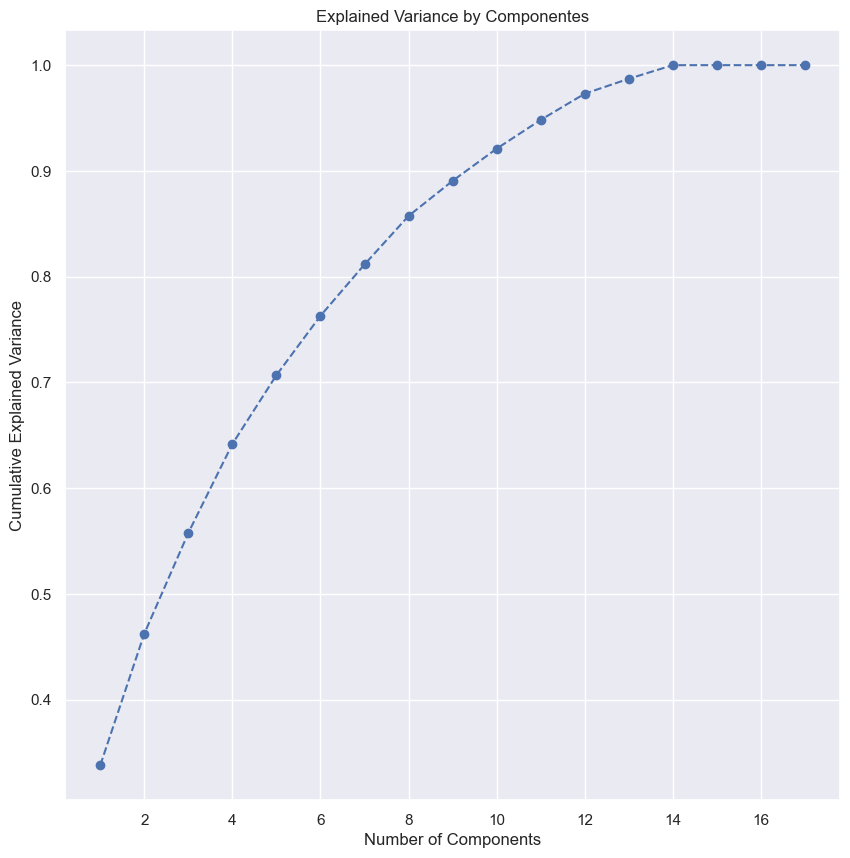

In [365]:
plt.figure(figsize=(10,10))
plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle='--')
plt.title('Explained Variance by Componentes')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [381]:
pca = PCA(n_components = 7)
pca.fit(df_std)

PCA(n_components=7)

In [382]:
pca.transform(df_std)

array([[-1.28004977,  0.35170315,  0.5349047 , ..., -0.6886208 ,
         0.71634022,  1.25829984],
       [-0.86842553,  0.27422386, -0.46160738, ..., -0.03578899,
         1.43008982, -0.05523964],
       [-0.40635695,  1.62352145, -0.12948931, ..., -2.61109209,
        -2.70922691, -0.2732317 ],
       ...,
       [ 0.91819401,  1.52200813, -0.32790154, ..., -1.05007996,
         1.34890014, -0.04469196],
       [ 6.80014229,  1.48475896, -0.72040215, ...,  0.46665103,
         1.49813991, -1.46422026],
       [-0.2815391 ,  0.42546901,  2.5086861 , ...,  0.63133723,
         1.76144793, -0.62740385]])

In [383]:
scores_pca = pca.transform(df_std)

In [388]:
wcss = []
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

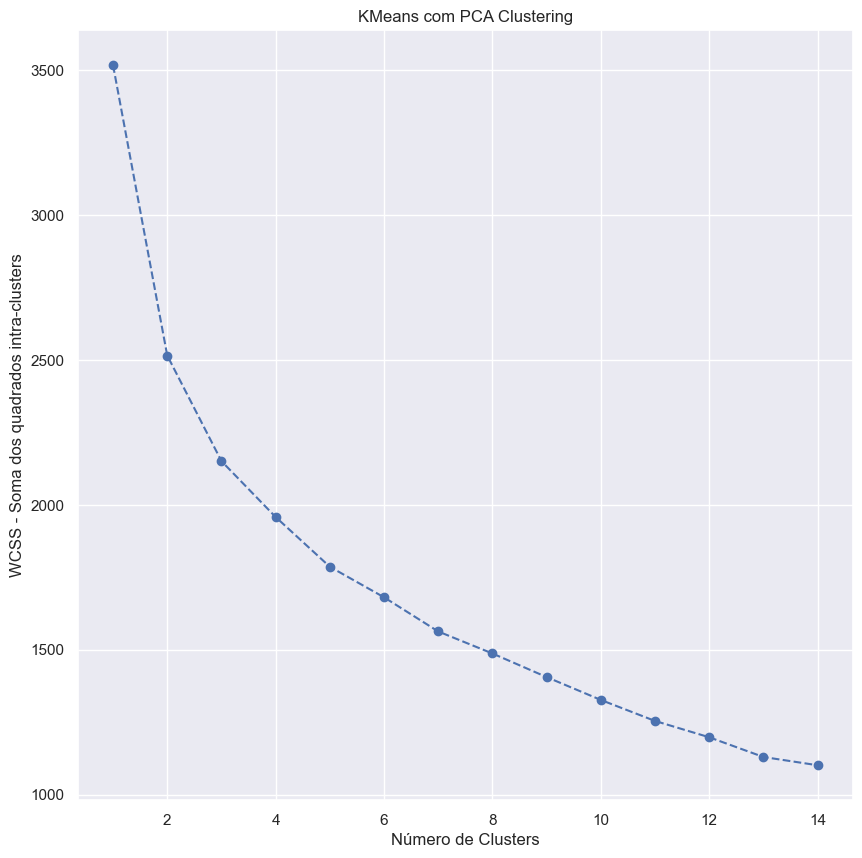

In [389]:
plt.figure(figsize=(10,10))
plt.plot(range(1,15), wcss, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel('WCSS - Soma dos quadrados intra-clusters')
plt.title("KMeans com PCA Clustering")
plt.show()

In [390]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)


c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [391]:
df_p_pca_kmeans = pd.concat([df_p.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_p_pca_kmeans.columns.values[-7: ] = ['Comp 1', 'Comp 2', 'Comp 3', 'Comp 4', 'Comp 5', 'Comp 6', 'Comp 7']
df_p_pca_kmeans['Cluster'] = kmeans_pca.labels_

df_p_pca_kmeans.head()

,P15,P16,P17,P19,P20,P21,P22,P23,P24,P26,...,Qreg,Qclasse,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5,Comp 6,Comp 7,Cluster
0,7.0,7.0,3.0,7.0,7.0,7.0,7.0,7.0,3.0,7.0,...,3,5,-1.280050,0.351703,0.534905,1.701687,-0.688621,0.716340,1.258300,0
1,6.0,7.0,6.0,6.0,7.0,7.0,4.0,6.0,6.0,4.0,...,4,3,-0.868426,0.274224,-0.461607,-1.254198,-0.035789,1.430090,-0.055240,0
2,1.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,7.0,7.0,...,2,3,-0.406357,1.623521,-0.129489,-0.599753,-2.611092,-2.709227,-0.273232,0
3,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,4,5,-2.639375,1.138531,0.734653,0.258850,-1.292093,0.745593,0.316523,0
4,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,4,1,-2.813765,0.150578,-1.867906,0.002783,-0.127174,0.936085,-1.191247,0


In [392]:
grouped_by_clusters = df_p_pca_kmeans.groupby('Cluster')
grouped_by_clusters.describe()

P15                                                 P16            \
         count      mean       std  min  25%  50%  75%  max  count      mean   
Cluster                                                                        
0        129.0  6.596899  0.888462  1.0  7.0  7.0  7.0  7.0  129.0  6.302326   
1         63.0  6.349206  0.864324  4.0  6.0  7.0  7.0  7.0   63.0  3.714286   
2         63.0  3.444444  1.267176  1.0  3.0  4.0  4.0  5.0   63.0  3.571429   

         ...    Comp 6           Comp 7                                \
         ...       75%       max  count      mean       std       min   
Cluster  ...                                                            
0        ...  0.772824  1.775674  129.0 -0.082760  0.930997 -1.925252   
1        ...  0.809177  2.901797   63.0  0.212947  0.875039 -2.174832   
2        ...  0.375145  2.053806   63.0 -0.043486  0.882018 -1.890198   

                                                 
              25%       50%       75%       max  
Cluster                                          
0       -0.660297 -0.185000  0.453083  3.123958  
1       -0.070434  0.373024  0.707764  1.762649  
2       -0.634286  0.034268  0.557262  1.988952  

[3 rows x 168 columns]